In [1]:
import pandas as pd
import numpy as np

In [2]:
oneday=pd.read_csv('input/oneyear2.csv')

In [3]:
oneday.tail()

,Unnamed: 0,MTS,VOLUME,OPEN2,OPEN3,OPEN4,OPEN5,OPEN6,OPEN7,OPEN8,OPEN1
395,4,2018-12-11 16:00:00,20930.780792,-0.299557,-0.292092,-0.300637,-0.303519,-0.299067,-0.283974,-0.270738,-0.305082
396,3,2018-12-12 16:00:00,22248.786278,-0.305082,-0.299557,-0.292092,-0.300637,-0.303519,-0.299067,-0.283974,-0.298772
397,2,2018-12-13 16:00:00,28559.127026,-0.298772,-0.305082,-0.299557,-0.292092,-0.300637,-0.303519,-0.299067,-0.310161
398,1,2018-12-14 16:00:00,17889.937985,-0.310161,-0.298772,-0.305082,-0.299557,-0.292092,-0.300637,-0.303519,-0.314720
399,0,2018-12-15 16:00:00,6807.815932,-0.314720,-0.310161,-0.298772,-0.305082,-0.299557,-0.292092,-0.300637,-0.314682


In [4]:
train=oneday.values[10:350]
test=oneday.values[350:390]

In [5]:
train_X=train[:,2:10]
test_X=test[:,2:10]

In [6]:
train_Y=train[:,10]
test_Y=test[:,10]

In [7]:
train_X=train_X.reshape(-1,8,1)
train_Y=train_Y.reshape(-1,1)

In [8]:
test_X=test_X.reshape(-1,8,1)
test_Y=test_Y.reshape(-1,1)

In [9]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import warnings
import keras
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [11]:
np.set_printoptions(threshold=np.nan)

In [12]:
def LSTM8():
    model = Sequential()
    # model.add(LSTM(units=4,input_shape=(input_dim,step)))
    model.add(LSTM(
            16,input_dim=1,input_length=8,stateful=False,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(
            32,stateful=False,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(16,kernel_initializer="uniform",activation='softmax')) 
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [13]:
model=LSTM8()
model.fit(train_X,train_Y,batch_size=32,epochs=1000,validation_split=0.1,verbose=1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, stateful=False, return_sequences=True, input_shape=(8, 1))`


Train on 306 samples, validate on 34 samples
Epoch 1/1000
306/306 [==============================] - 1s 4ms/step - loss: 0.0385 - val_loss: 0.0443
Epoch 2/1000
306/306 [==============================] - 0s 364us/step - loss: 0.0356 - val_loss: 0.0335
Epoch 3/1000
306/306 [==============================] - 0s 304us/step - loss: 0.0340 - val_loss: 0.0226
Epoch 4/1000
306/306 [==============================] - 0s 319us/step - loss: 0.0335 - val_loss: 0.0210
Epoch 5/1000
306/306 [==============================] - 0s 334us/step - loss: 0.0329 - val_loss: 0.0217

In [14]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

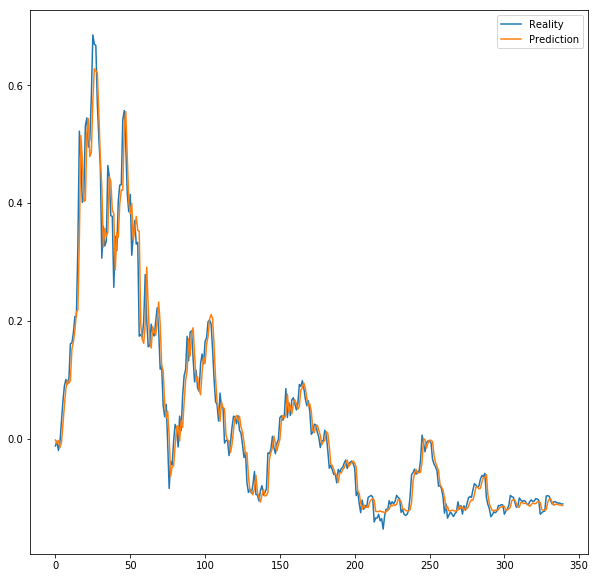

In [15]:
plt.figure(figsize=(10,10)) 
l1,=plt.plot(train_Y[:])
l2,=plt.plot(trainPredict[:])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

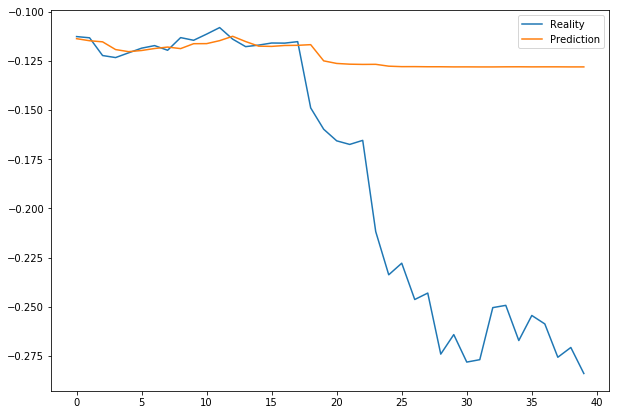

In [16]:

plt.figure(figsize=(10,7)) 
l1,=plt.plot(test_Y[:])
l2,=plt.plot(testPredict[:])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

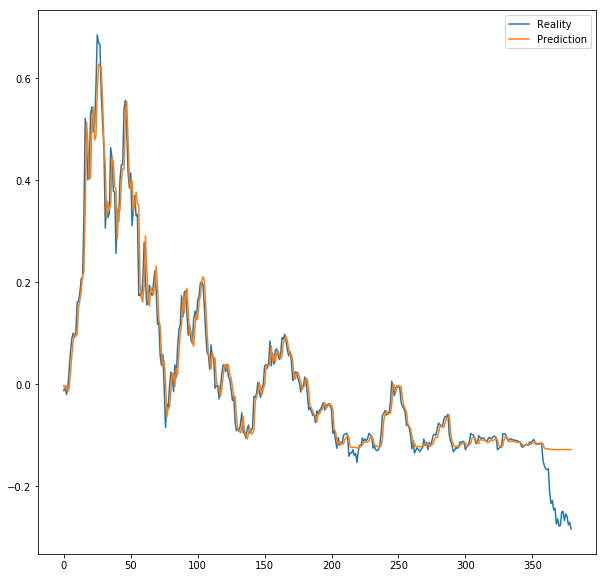

In [17]:
plt.figure(figsize=(10,10)) 
l1,=plt.plot(np.concatenate((train_Y,test_Y),axis=0))
l2,=plt.plot(np.concatenate((trainPredict,testPredict),axis=0))
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

In [18]:
import math
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.03 RMSE
Test Score: 0.09 RMSE
